In [167]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
import pymongo
client = pymongo.MongoClient('localhost', 27017)
db = client['zhihu_db']
zhihu_info = db['zhihu_collection']
# 加载数据到Pandas中
data = pd.DataFrame(list(zhihu_info.find()))
# 查看爬取的数据
data

,_id,name,intro,detail,following,followers
0,644e3aaf4dd9d676f8d61ded,也说,百万赞作者，只聊有意思。,​咨询分析情感与职场话题温柔耐心答主​恋爱与办公室首席观察师,55,"203,012"
1,644e3ab44dd9d676f8d61dee,王豆皮,「动物行为学」爱好者｜猫咪行为观察员,​畜牧养殖业鹈鹕镇养猫​克莱登大学牧场物语专业​,"1,315","26,722"
2,644e3ab94dd9d676f8d61def,KellyWeaver,公共卫生 / 心血管流行病学，发言与所在机构无关,​医疗服务​,176,"270,775"
3,644e3ac04dd9d676f8d61df0,千叶,最近在做视频，见公众号Free Harbor,​,NaN,NaN
4,644e3ac54dd9d676f8d61df1,我攻势如风,减少期待，戒掉敏感,​,23,38
...,...,...,...,...,...,...
17702,6450a0324dd9d676f8d66313,熊猫小韩,抗癌学习社群发起人，加病友群关注熊猫和朋友们公众号,​互联网​蓝旗营理工学院通信工程​,324,"11,880"
17703,6450a03f4dd9d676f8d66314,FAQ,数学物理半吊子,​计算机软件AutodeskM&E Senior Software Engineer​,114,"4,415"
17704,6450a0444dd9d676f8d66315,小狸花奶糖,一只长期主义的幸福兔子,​电子商务美团产品运营​北京邮电大学工商管理​,471,"14,841"
17705,6450a04b4dd9d676f8d66316,天堂与地狱,一个独立金融产品投资人,​资本投资通天投资有限公司外汇投资​电子科技大学工商管理​,"4,614",794


In [94]:
# 处理无效的垃圾数据
data.dropna(subset=['name', 'followers', 'following'], inplace=True)
# detail列和intro列有些数据是缺失值,用空字符串去填充
data.fillna('', inplace=True)
data

,_id,name,intro,detail,following,followers
0,644e3aaf4dd9d676f8d61ded,也说,百万赞作者，只聊有意思。,​咨询分析情感与职场话题温柔耐心答主​恋爱与办公室首席观察师,55,"203,012"
1,644e3ab44dd9d676f8d61dee,王豆皮,「动物行为学」爱好者｜猫咪行为观察员,​畜牧养殖业鹈鹕镇养猫​克莱登大学牧场物语专业​,"1,315","26,722"
2,644e3ab94dd9d676f8d61def,KellyWeaver,公共卫生 / 心血管流行病学，发言与所在机构无关,​医疗服务​,176,"270,775"
4,644e3ac54dd9d676f8d61df1,我攻势如风,减少期待，戒掉敏感,​,23,38
5,644e3acb4dd9d676f8d61df2,亦心,美食知势榜霸榜|茶咖酒饮和礼品推荐|合作见详情,​高新科技大众点评网特邀食评​北京工业大学土木工程​,"4,181","5,767"
...,...,...,...,...,...,...
17702,6450a0324dd9d676f8d66313,熊猫小韩,抗癌学习社群发起人，加病友群关注熊猫和朋友们公众号,​互联网​蓝旗营理工学院通信工程​,324,"11,880"
17703,6450a03f4dd9d676f8d66314,FAQ,数学物理半吊子,​计算机软件AutodeskM&E Senior Software Engineer​,114,"4,415"
17704,6450a0444dd9d676f8d66315,小狸花奶糖,一只长期主义的幸福兔子,​电子商务美团产品运营​北京邮电大学工商管理​,471,"14,841"
17705,6450a04b4dd9d676f8d66316,天堂与地狱,一个独立金融产品投资人,​资本投资通天投资有限公司外汇投资​电子科技大学工商管理​,"4,614",794


In [95]:
# 将关注的人数(followers)和粉丝数(following)这两列的数据去掉逗号(,)转换为int型
data['followers'] = data['followers'].astype(str).str.replace(',', '')
data['followers'] = data['followers'].astype('int32')
data['following'] = data['following'].astype(str).str.replace(',', '')
data['following'] = data['following'].astype('int32')
# 分析我们处理好的数据
data.describe()

,following,followers
count,16188.000000,1.618800e+04
mean,234.312577,3.138130e+04
std,1071.226286,1.582950e+05
min,0.000000,0.000000e+00
25%,11.000000,1.390000e+02
50%,50.000000,1.303500e+03
75%,173.000000,1.138825e+04
max,107099.000000,1.248084e+07


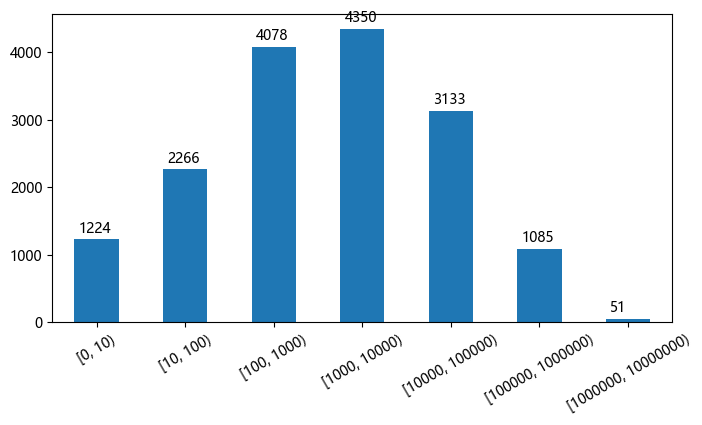

In [169]:
# 统计粉丝数的分布情况
bins = [0, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
counts = pd.cut(data.followers, bins, right=False).value_counts().sort_index()
ax = counts.plot.bar(figsize=(8, 4), rot=30)

# 在每个条形的顶部添加文本标签
for i, v in enumerate(counts):
    ax.text(i - 0.2, v + 100, str(v), color='black')

plt.show()

<AxesSubplot: ylabel='following'>

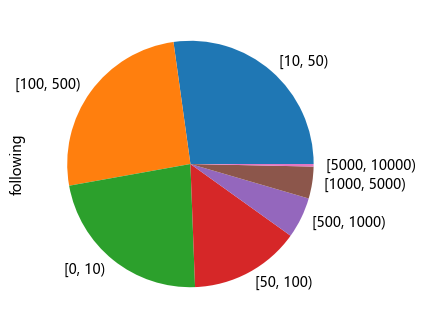

In [171]:
# 知乎用户关注的人数分布情况
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000]
pd.cut(data['following'], bins, right=False).value_counts().plot.pie(figsize=(4, 4))

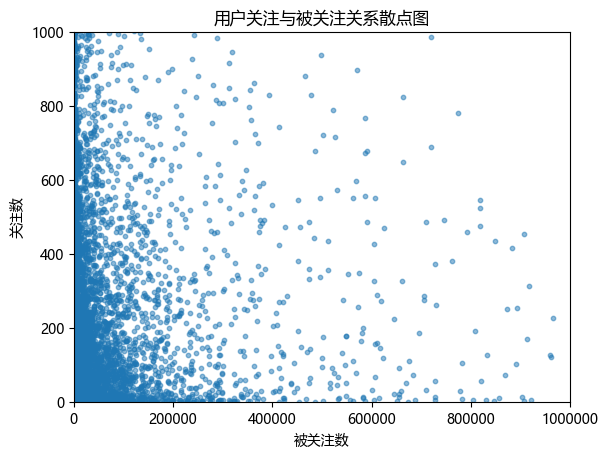

In [182]:
# 绘制散点图
plt.scatter(data['followers'], data['following'], s=10, alpha=0.5)
# 设置横轴刻度格式
plt.ticklabel_format(style='plain', axis='x')
# 添加标题和标签
plt.title('用户关注与被关注关系散点图')
plt.xlabel('被关注数')
plt.ylabel('关注数')
# 设置横纵坐标取值范围
plt.xlim(0, 1000000)
plt.ylim(0, 1000)
plt.show()

In [123]:
# 分析知乎用户从事的职业
# 有的用户在介绍中表明了自己的职业,也有的用户在个人资料中标明,我们合并detail列和intro列作为个人信息进行分析
data['intro'] = data['intro'] + data['detail']
# 查询个人信息中包含互联网的人数
count = sum(data.intro.str.contains('互联网'))
print(f"个人信息中包含互联网的人数为：{count}")

个人信息中包含互联网的人数为：1835


从事互联网相关行业的人数为：2743
从事企业高官相关行业的人数为：415
从事房地产相关行业的人数为：102
从事教育相关行业的人数为：955
目前仍在高校读书的人数为：3580


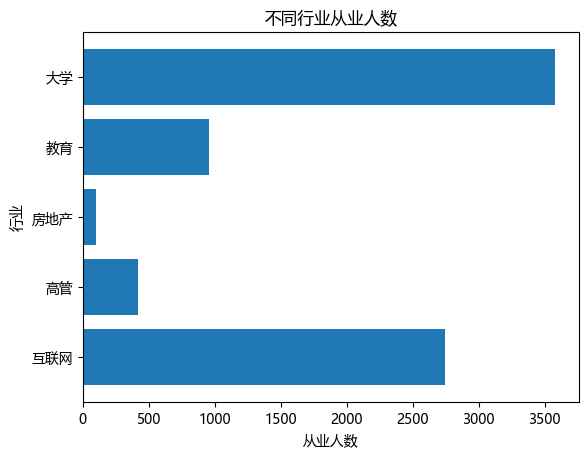

In [186]:
# 我们将条件更泛化一点
count1 = len(data[data['intro'].str.contains('互联网|软件|程序员|码农|计算机|IT')])
print(f"从事互联网相关行业的人数为：{count1}")
count2 = len(data[data['intro'].str.contains('CEO|创始人|总经理|总监|合伙人')])
print(f"从事企业高官相关行业的人数为：{count2}")
count3 = len(data[data['intro'].str.contains('房地产')])
print(f"从事房地产相关行业的人数为：{count3}")
count4 = len(data[data['intro'].str.contains('教育')])
print(f"从事教育相关行业的人数为：{count4}")
count5 = len(data[data['intro'].str.contains('大学')])
print(f"目前仍在高校读书的人数为：{count5}")
# 从事互联网相关行业的人数
count1 = len(data[data['intro'].str.contains('互联网|软件|程序员|码农|计算机|IT')])
# 从事企业高官相关行业的人数
count2 = len(data[data['intro'].str.contains('CEO|创始人|总经理|总监|合伙人')])
# 从事房地产相关行业的人数
count3 = len(data[data['intro'].str.contains('房地产')])
# 从事教育相关行业的人数
count4 = len(data[data['intro'].str.contains('教育')])
# 目前仍在高校读书的人数
count5 = len(data[data['intro'].str.contains('大学')])
# 可视化不同行业从业人数比例
labels = ['互联网', '高管', '房地产', '教育', '大学']
values = [count1, count2, count3, count4, count5]
fig, ax = plt.subplots()
ax.barh(labels, values)
ax.set_title('不同行业从业人数')
ax.set_xlabel('从业人数')
ax.set_ylabel('行业')
plt.show()

在我们爬取的数据中,粉丝数大于100000的知乎大V共有1137位，其中268位大V从事互联网相关行业
因此，互联网相关行业的知乎大V在所以的知乎大V中的占比为23.57%


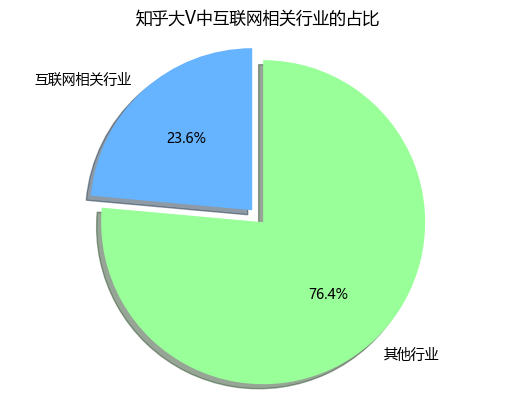

In [155]:
data['is_internet'] = data.intro.map(lambda x:1 if any(word in x for word in ['互联网','软件','程序员','码农','计算机','IT']) else 0)
# 针对知乎大V(粉丝数>100000)的数据分析
dav = data[data.followers > 100000]
sum(dav.is_internet == 1), len(dav)
# 计算结果
internet_dav = sum(dav.is_internet == 1)
total_dav = len(dav)
non_internet_dav = total_dav - internet_dav
# 输出结果
print("在我们爬取的数据中,粉丝数大于100000的知乎大V共有{}位，其中{}位大V从事互联网相关行业".format(total_dav, internet_dav))
print("因此，互联网相关行业的知乎大V在所以的知乎大V中的占比为{:.2f}%".format(100 * internet_dav / total_dav))
# 绘制饼图
labels = ['互联网相关行业', '其他行业']
sizes = [internet_dav, non_internet_dav]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)  # 突出显示互联网相关行业
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('知乎大V中互联网相关行业的占比')
plt.show()

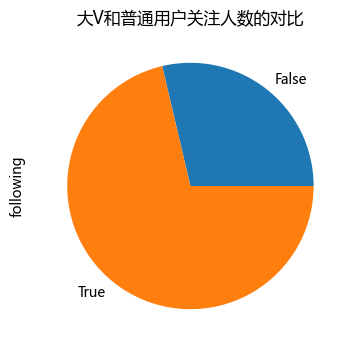

In [189]:
# 大V和普通用户关注人数的对比
data.groupby(data.followers > 100000)['following'].mean().plot.pie(figsize=(4, 4))
plt.title('大V和普通用户关注人数的对比')
plt.show()

知乎用户中职位为高管的用户平均粉丝数为：390929.78571428574


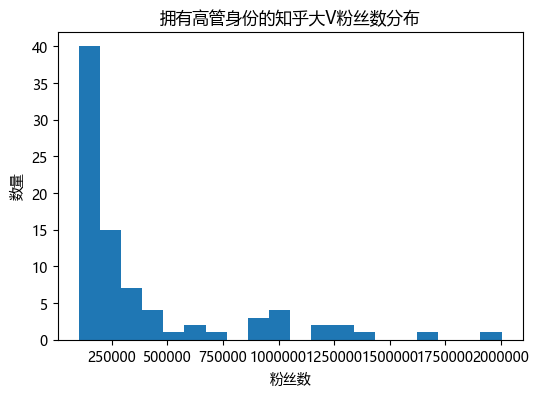

In [199]:
# 大V中高管的粉丝数分布情况
count = dav[dav.intro.str.contains('CEO|创始人|总经理|总监|合伙人')].followers.mean()
print(f"知乎用户中职位为高管的用户平均粉丝数为：{count}")
ax = dav[dav.intro.str.contains('CEO|创始人|总经理|总监|合伙人')].followers.plot.hist(bins=20, figsize=(6, 4))
# 禁用横轴科学计数法
ax.ticklabel_format(style='plain', axis='x')
# 添加标题和标签
plt.title('拥有高管身份的知乎大V粉丝数分布')
plt.xlabel('粉丝数')
plt.ylabel('数量')
plt.show()